<a href="https://colab.research.google.com/github/tjdmstj/Chapter2/blob/main/chapter02_mathematical_building_blocks_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
import tensorflow

In [2]:
tensorflow.keras.datasets.mnist.load_data?

In [3]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
import tensorflow as tf

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [7]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [15]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [16]:
train_images[0].shape

(28, 28)

In [17]:
train_images=train_images.reshape([60000,28*28])

In [18]:
train_images.shape

(60000, 784)

In [19]:
train_images[0].shape

(784,)

In [20]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
train_images=train_images.astype("float32")/255

In [22]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [24]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 16ms/step - loss: 1.4619 - accuracy: 0.6626
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.5764 - accuracy: 0.8553
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.4081 - accuracy: 0.8889
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3509 - accuracy: 0.9011
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3217 - accuracy: 0.9086


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [28]:
test_images.shape

(10000, 784)

In [29]:
test_digits=test_images[0:10]

In [30]:
test_digits.shape

(10, 784)

In [31]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.9023067e-05, 5.1355080e-08, 1.8800269e-05, 4.0629131e-04,
       8.6847280e-07, 1.9493298e-05, 6.6216326e-09, 9.9809641e-01,
       6.0116668e-06, 1.4131266e-03], dtype=float32)

In [32]:
predictions[0].argmax()

7

In [33]:
predictions[0][7]

0.9980964

In [34]:
test_labels[0]

7

**Evaluating the model on new data**

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9136
test_acc: 0.9136000275611877


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [36]:
import numpy as np
x = np.array(12)
x

array(12)

In [37]:
x.ndim

0

### Vectors (rank-1 tensors)

In [38]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [39]:
x.ndim

1

### Matrices (rank-2 tensors)

In [40]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [41]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [42]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
train_images.ndim

3

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
train_images.dtype

dtype('uint8')

unit8 = 2^8 = 256

**Displaying the fourth digit**

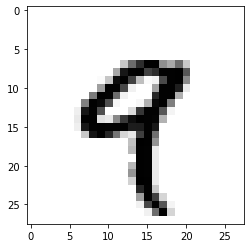

In [46]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [47]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [48]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [49]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [50]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [51]:
my_slice = train_images[:, 14:, 14:]

In [52]:
my_slice = train_images[:, 7:-7, 7:-7]

In [53]:
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

In [54]:
my_slice=train_images[:,5:,5:]

<function matplotlib.pyplot.show>

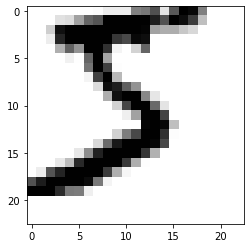

In [55]:
plt.imshow(my_slice[0],cmap=plt.cm.binary)
plt.show

In [56]:
my_slice=train_images[:,7:-7,7:-7]

<function matplotlib.pyplot.show>

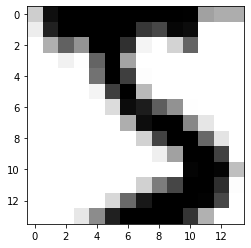

In [57]:
plt.imshow(my_slice[0],cmap=plt.cm.binary)
plt.show

### The notion of data batches

In [58]:
batch = train_images[:128]

In [59]:
batch = train_images[128:256]

In [60]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [61]:
import numpy as np

In [62]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [63]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [64]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [65]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))    #더오래걸림

Took: 2.33 s


### Broadcasting

In [66]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [67]:
X.shape

(32, 10)

In [68]:
y.shape

(10,)

In [69]:
y = np.expand_dims(y, axis=0)

In [70]:
Y = np.concatenate([y] * 32, axis=0)

In [71]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [72]:
X+y

array([[0.7526371 , 0.5009855 , 1.59250333, 0.66801177, 0.63227723,
        1.84324326, 0.4531332 , 1.7163631 , 1.52152268, 1.34845518],
       [0.26491984, 1.19055458, 1.0078983 , 0.49136621, 0.78075116,
        1.04643916, 1.12184813, 1.46956662, 1.14938837, 1.66733988],
       [0.24454402, 0.74989729, 1.64608976, 0.89922065, 1.13773781,
        1.69109441, 1.12273392, 0.84414701, 1.57876808, 1.68500032],
       [0.81070152, 0.55541756, 1.57704696, 0.5863975 , 1.06955348,
        0.99721337, 1.27005624, 1.77217236, 1.5570677 , 1.2550615 ],
       [0.1984741 , 0.71549459, 0.7185438 , 0.82837842, 0.61752841,
        1.68562242, 1.01949403, 1.11939464, 1.14774992, 1.00787642],
       [0.37266041, 0.32857984, 1.25470156, 0.9384116 , 1.31898703,
        1.11593949, 1.38807921, 0.85854089, 1.52994545, 0.91823526],
       [0.08850337, 0.56348887, 1.35885005, 1.04934819, 0.69479651,
        1.74951825, 0.65569174, 0.9322009 , 1.02049341, 1.29235125],
       [0.39774711, 0.43590799, 0.7731389

In [73]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [74]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [75]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [76]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [77]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [78]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [79]:
train_images = train_images.reshape((60000, 28 * 28))

In [80]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [81]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [82]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [83]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [84]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [85]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [86]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [87]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [88]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [89]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2534 - accuracy: 0.9271
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1018 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0489 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0368 - accuracy: 0.9886


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [90]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [91]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [92]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [93]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [94]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [95]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [96]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [97]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [98]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.03
loss at batch 100: 2.26
loss at batch 200: 2.22
loss at batch 300: 2.08
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.90
loss at batch 200: 1.84
loss at batch 300: 1.71
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.60
loss at batch 200: 1.52
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.32
loss at batch 100: 1.36
loss at batch 200: 1.26
loss at batch 300: 1.21
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.17
loss at batch 200: 1.07
loss at batch 300: 1.05
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.03
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.82
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.74
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [99]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary